In [ ]:
!unzip -q /content/drive/MyDrive/flower_dataset.zip

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Add, ZeroPadding2D, ReLU, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, SeparableConv2D, GlobalAvgPool2D

In [ ]:
train_dataset= keras.utils.image_dataset_from_directory(directory='flowers',
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   batch_size=32,
                                                   image_size=(256,256),
                                                   seed=42,
                                                   validation_split=0.2,
                                                   subset='training')

validation_dataset = keras.utils.image_dataset_from_directory(directory='flowers',
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   batch_size=32,
                                                   image_size=(256,256),
                                                   seed=42,
                                                   validation_split=0.2,
                                                   subset='validation')

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
# our very first model

inputs = keras.Input(shape=(256, 256, 3))
x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(128, 3, activation='relu')(x)
x = Flatten()(x)
x = Dense(20, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(5, activation='softmax')(x)
model_1 = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856 

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="model_1.keras",
    save_best_only=True,
    monitor="val_loss"),
  keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    min_delta=0.001,  # Minimum change in monitored metric to consider improvement
    patience=5,  # Number of epochs to wait for improvement before stopping
    verbose=1,  # Verbosity mode (0 or 1)
    mode='min')
 ]


In [ ]:
model_1.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [ ]:
history = model_1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
108/108 [==============================] - 21s 123ms/step - loss: 50.9717 - accuracy: 0.2371 - val_loss: 1.6064 - val_accuracy: 0.2387
Epoch 2/30
108/108 [==============================] - 11s 96ms/step - loss: 1.6042 - accuracy: 0.2449 - val_loss: 1.6040 - val_accuracy: 0.2387
Epoch 3/30
108/108 [==============================] - 11s 95ms/step - loss: 1.6017 - accuracy: 0.2449 - val_loss: 1.6026 - val_accuracy: 0.2387
Epoch 4/30
108/108 [==============================] - 11s 95ms/step - loss: 1.6001 - accuracy: 0.2449 - val_loss: 1.6019 - val_accuracy: 0.2387
Epoch 5/30
108/108 [==============================] - 10s 84ms/step - loss: 1.5992 - accuracy: 0.2449 - val_loss: 1.6017 - val_accuracy: 0.2387
Epoch 6/30
108/108 [==============================] - 11s 96ms/step - loss: 1.5987 - accuracy: 0.2449 - val_loss: 1.6015 - val_accuracy: 0.2387
Epoch 6: early stopping


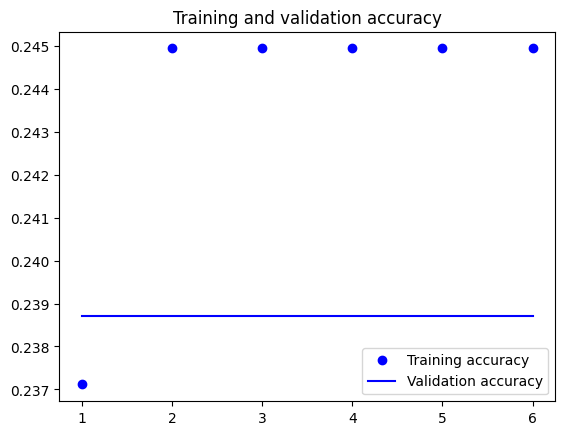

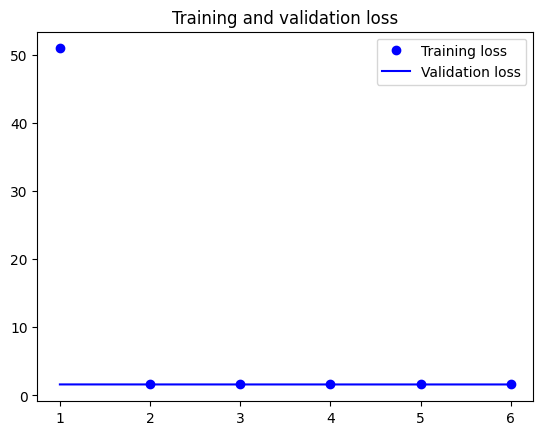

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
best_model_1 = keras.models.load_model("model_1.keras")
best_model_1.evaluate(validation_dataset)

27/27 [==============================] - 2s 49ms/step - loss: 1.6015 - accuracy: 0.2387


[1.6015489101409912, 0.2387022078037262]

In [ ]:
# nightmare of a model, not learning at all

In [ ]:
# model 2, as the model 1 is failing to learn the features we will increase the conv layers, in order it to be able to learn

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = Conv2D(filters=16, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D(2, strides=2)(x)
x = Conv2D(128, 3, activation='relu')(x)
x = MaxPooling2D(2, strides=2)(x)
x = Conv2D(256, 3, activation='relu')(x) # increased the conv layer with 256 filters
x = MaxPooling2D(2, strides=2)(x)
x = Flatten()(x)
outputs = Dense(5, activation='softmax')(x)
model_2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 128)       3699

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="model_2.keras",
    save_best_only=True,
    monitor="val_accuracy"),
  # keras.callbacks.EarlyStopping(
  #   monitor='val_accuracy',
  #   min_delta=0.001,
  #   patience=5,
  #   verbose=1,
  #   mode='min')
 ]

In [ ]:
model_2.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [ ]:
# training it for 10 epochs
history = model_2.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
108/108 [==============================] - 11s 85ms/step - loss: 5.4024 - accuracy: 0.4244 - val_loss: 1.1309 - val_accuracy: 0.5122
Epoch 2/10
108/108 [==============================] - 9s 73ms/step - loss: 1.1073 - accuracy: 0.5617 - val_loss: 1.0808 - val_accuracy: 0.5643
Epoch 3/10
108/108 [==============================] - 10s 94ms/step - loss: 0.9673 - accuracy: 0.6381 - val_loss: 1.0952 - val_accuracy: 0.5655
Epoch 4/10
108/108 [==============================] - 13s 117ms/step - loss: 0.7778 - accuracy: 0.7041 - val_loss: 1.1374 - val_accuracy: 0.5562
Epoch 5/10
108/108 [==============================] - 10s 89ms/step - loss: 0.6497 - accuracy: 0.7609 - val_loss: 1.2102 - val_accuracy: 0.5771
Epoch 6/10
108/108 [==============================] - 9s 79ms/step - loss: 0.5089 - accuracy: 0.8199 - val_loss: 1.4018 - val_accuracy: 0.5782
Epoch 7/10
108/108 [==============================] - 10s 94ms/step - loss: 0.4295 - accuracy: 0.8541 - val_loss: 1.4511 - val_accuracy: 

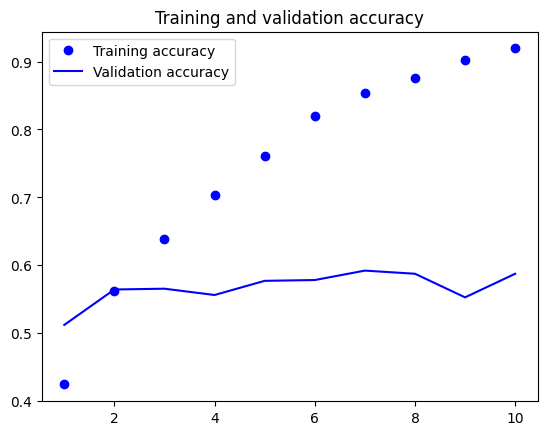

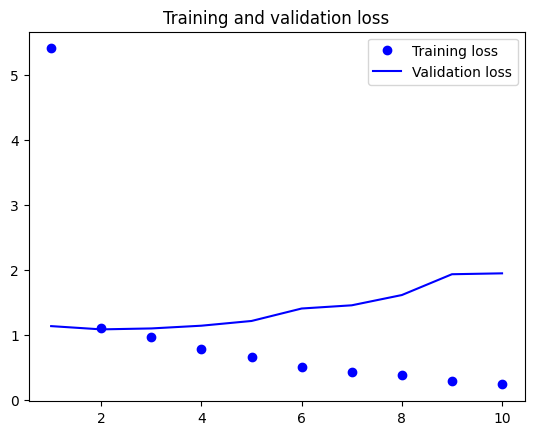

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
best_model_2 = keras.models.load_model("model_2.keras")
best_model_2.evaluate(validation_dataset)

27/27 [==============================] - 2s 42ms/step - loss: 1.4511 - accuracy: 0.5921


[1.4510846138000488, 0.5921205282211304]

In [ ]:
# better from the previous one, but the model has high variance

In [ ]:
# model 2 has high variance, so we will use common regularization techniques to reduce variance

In [ ]:
# model 3

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))

#rescaling the input to be between [0, 1]
rescaling_layer = keras.layers.Rescaling(scale=1./255)

inputs = rescaling_layer(inputs)

# Batch Normalization after each convolutional layer
x = Conv2D(filters=16, kernel_size=3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(inputs)
x = BatchNormalization()(x)  # Added BatchNormalization
x = MaxPooling2D(pool_size=2, strides=2)(x)
                                                              # use_bias = False beacuse we are using batch normailzation after this layer
                                                              # adding bias will have no effect, will get subtracted either way
x = Conv2D(32, 3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(x)
x = BatchNormalization()(x)  # Added BatchNormalization
x = MaxPooling2D(2, strides=2)(x)

x = Conv2D(128, 3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(x)
x = BatchNormalization()(x)  # Added BatchNormalization
x = MaxPooling2D(2, strides=2)(x)

x = Conv2D(256, 3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(x)
x = BatchNormalization()(x)  # Added BatchNormalization
x = MaxPooling2D(2, strides=2)(x)

# Dropout after Flatten layer
x = Flatten()(x)
x = Dropout(0.2)(x)  # Added Dropout with rate 0.2

outputs = Dense(5, activation='softmax')(x)
model_3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="model_3.keras",
    save_best_only=True,
    monitor="val_loss"),
  # keras.callbacks.EarlyStopping(
  #   monitor='val_accuracy',
  #   min_delta=0.001,
  #   patience=5,
  #   verbose=1,
  #   mode='min')
 ]

In [ ]:
model_3.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])
# model was training fine for upto 10 epochs, so will train it for 20 epochs
history = model_3.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
108/108 [==============================] - 16s 124ms/step - loss: 6.8870 - accuracy: 0.4213 - val_loss: 11.4290 - val_accuracy: 0.4044
Epoch 2/20
108/108 [==============================] - 11s 95ms/step - loss: 5.0048 - accuracy: 0.4994 - val_loss: 9.5718 - val_accuracy: 0.4670
Epoch 3/20
108/108 [==============================] - 10s 89ms/step - loss: 5.3837 - accuracy: 0.5440 - val_loss: 7.9196 - val_accuracy: 0.4693
Epoch 4/20
108/108 [==============================] - 9s 81ms/step - loss: 4.0829 - accuracy: 0.5877 - val_loss: 4.3802 - val_accuracy: 0.5655
Epoch 5/20
108/108 [==============================] - 11s 101ms/step - loss: 3.5072 - accuracy: 0.6595 - val_loss: 5.2196 - val_accuracy: 0.5469
Epoch 6/20
108/108 [==============================] - 13s 115ms/step - loss: 2.9521 - accuracy: 0.6922 - val_loss: 5.5250 - val_accuracy: 0.5550
Epoch 7/20
108/108 [==============================] - 11s 100ms/step - loss: 2.4590 - accuracy: 0.7334 - val_loss: 4.9975 - val_accur

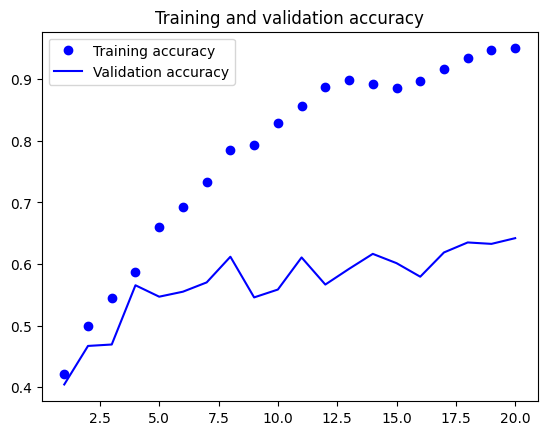

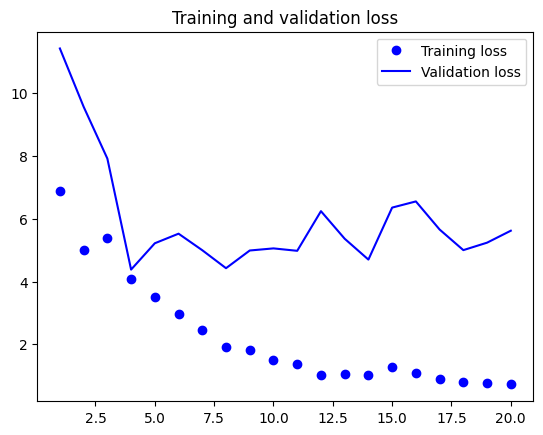

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# reached 64% validation accuracy, best till now
# but is still overfitting, we will use data augmentation

In [ ]:
# creating another model, we will use common data augmentation techniques

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [ ]:
data_augmentation = keras.Sequential(
    [
      RandomFlip("horizontal"),
      RandomRotation(0.15),
      RandomZoom(0.2),
    ]
 )

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
# data augmentation
x = data_augmentation(inputs)
#rescaling the input to be between [0, 1]
rescaling_layer = keras.layers.Rescaling(scale=1/255)

x = rescaling_layer(x)

x = Conv2D(filters=16, kernel_size=3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)

x = Conv2D(32, 3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, strides=2)(x)

x = Conv2D(128, 3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, strides=2)(x)

x = Conv2D(256, 3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, strides=2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

outputs = Dense(5, activation='softmax')(x)
model_4 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="model_4.keras",
    save_best_only=True,
    monitor="val_accuracy"),
 ]

In [ ]:
model_4.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])
# will train for more epochs, coz model should not overfit due to data augmentation
history = model_4.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
108/108 [==============================] - 13s 98ms/step - loss: 4.9091 - accuracy: 0.5738 - val_loss: 4.1468 - val_accuracy: 0.6025
Epoch 2/30
108/108 [==============================] - 11s 98ms/step - loss: 4.3154 - accuracy: 0.6054 - val_loss: 6.6856 - val_accuracy: 0.5898
Epoch 3/30
108/108 [==============================] - 15s 138ms/step - loss: 4.0384 - accuracy: 0.6126 - val_loss: 3.9349 - val_accuracy: 0.6014
Epoch 4/30
108/108 [==============================] - 10s 88ms/step - loss: 3.9172 - accuracy: 0.6074 - val_loss: 4.2144 - val_accuracy: 0.5632
Epoch 5/30
108/108 [==============================] - 10s 88ms/step - loss: 4.1350 - accuracy: 0.5834 - val_loss: 3.3812 - val_accuracy: 0.6234
Epoch 6/30
108/108 [==============================] - 11s 101ms/step - loss: 3.4304 - accuracy: 0.6120 - val_loss: 5.1328 - val_accuracy: 0.5991
Epoch 7/30
108/108 [==============================] - 10s 91ms/step - loss: 3.0282 - accuracy: 0.6280 - val_loss: 3.6079 - val_accurac

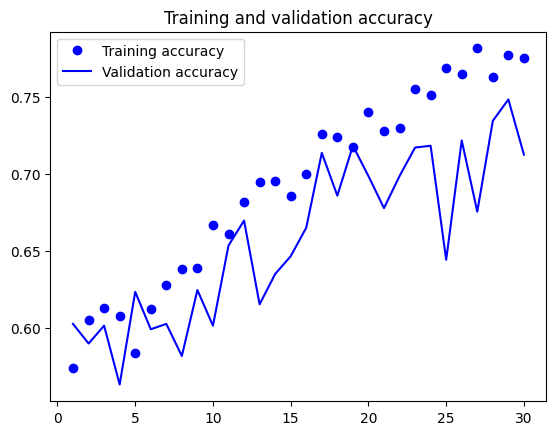

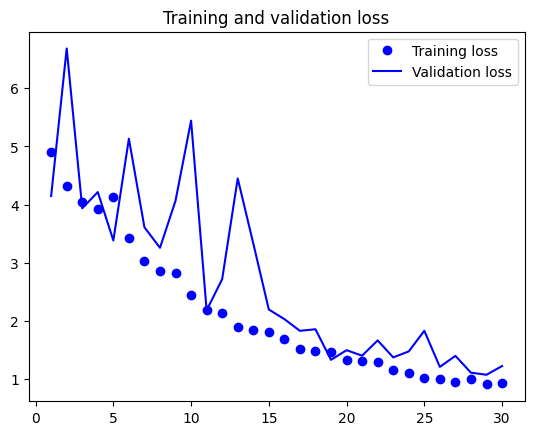

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
best_model_4 = keras.models.load_model("model_4.keras")
best_model_4.evaluate(validation_dataset)

27/27 [==============================] - 2s 47ms/step - loss: 1.0691 - accuracy: 0.7486


[1.069128394126892, 0.7485515475273132]

In [ ]:
# noice, training further should enhance the performance because validtion loss is going down consistently

In [ ]:
# implementing some famous convnets, but we will use heavy data augmentation because the models have
# huge number of parameters(prone to overfitting), and we have small amount of data

In [ ]:
# original implementation of these models used shape=(224, 224, 3)
# so reloading the data with appropriate shape

train_dataset= keras.utils.image_dataset_from_directory(directory='flowers',
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   batch_size=32,
                                                   image_size=(224,224),
                                                   seed=42,
                                                   validation_split=0.2,
                                                   subset='training')

validation_dataset = keras.utils.image_dataset_from_directory(directory='flowers',
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   batch_size=32,
                                                   image_size=(224,224),
                                                   seed=42,
                                                   validation_split=0.2,
                                                   subset='validation')

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
data_augmentation = keras.Sequential([keras.layers.RandomFlip("horizontal_and_vertical"),
                                      keras.layers.RandomRotation(factor=0.1),
                                      keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
                                      keras.layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3)),
                                      keras.layers.RandomBrightness(factor=0.1),
                                      keras.layers.RandomContrast(factor=0.1)])

In [ ]:
# AlexNet ;)

In [ ]:
def alexnet(input_shape, n_classes):

    input = keras.Input(input_shape)

    # data augmentation to prevent overfitting
    x = data_augmentation(inputs)
    # rescaling the input to be between [0, 1]
    rescaling_layer = keras.layers.Rescaling(scale=1./255)
    x = rescaling_layer(x)

    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)

    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)

    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)

    output = Dense(n_classes, activation='softmax')(x)

    model = keras.Model(input, output)
    return model


In [ ]:
alexnet = alexnet(input_shape=(224, 224, 3), n_classes=5)

In [ ]:
alexnet.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_12 (Ba  (None, 56, 56, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 27, 27, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_13 (Ba  (None, 27, 27, 256)       1024

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="alexnet.keras",
    save_best_only=True,
    monitor="val_accuracy"),
 ]

In [ ]:
alexnet.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

history = alexnet.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
108/108 [==============================] - 22s 142ms/step - loss: 4.2005 - accuracy: 0.3023 - val_loss: 1.7236 - val_accuracy: 0.2213
Epoch 2/30
108/108 [==============================] - 13s 116ms/step - loss: 1.4248 - accuracy: 0.4097 - val_loss: 1.2266 - val_accuracy: 0.4786
Epoch 3/30
108/108 [==============================] - 9s 85ms/step - loss: 1.2621 - accuracy: 0.4722 - val_loss: 1.3867 - val_accuracy: 0.4195
Epoch 4/30
108/108 [==============================] - 13s 113ms/step - loss: 1.1901 - accuracy: 0.5223 - val_loss: 1.2150 - val_accuracy: 0.5145
Epoch 5/30
108/108 [==============================] - 13s 114ms/step - loss: 1.0654 - accuracy: 0.5663 - val_loss: 1.1032 - val_accuracy: 0.5481
Epoch 6/30
108/108 [==============================] - 9s 79ms/step - loss: 1.0523 - accuracy: 0.5718 - val_loss: 1.2007 - val_accuracy: 0.5110
Epoch 7/30
108/108 [==============================] - 10s 87ms/step - loss: 0.9994 - accuracy: 0.5924 - val_loss: 1.2437 - val_accurac

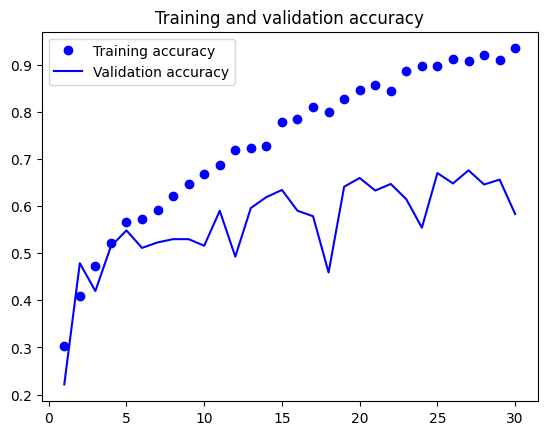

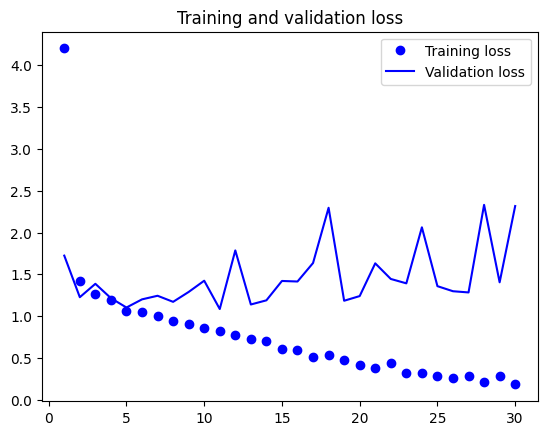

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# will require more data and training to perform better as no of parameters are huge
# model is overfitting

In [ ]:
# now implementing resnet50, hope it works fine

In [ ]:
def resnet50(input_shape=(224, 224, 3), n_classes=5):

    def conv_bn_relu(x, filters, kernel_size=1, strides=1, padding='same'):
        x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    def identity_block(tensor, filters):
        x = conv_bn_relu(tensor, filters)
        x = conv_bn_relu(x, filters, kernel_size=3)
        x = Conv2D(4 * filters, 1)(x)
        x = BatchNormalization()(x)

        x = Add()([x, tensor])
        output = ReLU()(x)
        return output

    def conv_block(tensor, filters, strides):
        x = conv_bn_relu(tensor, filters)
        x = conv_bn_relu(x, filters, kernel_size=3, strides=strides)
        x = Conv2D(4 * filters, 1)(x)
        x = BatchNormalization()(x)

        shortcut = Conv2D(4 * filters, 1, strides=strides)(tensor)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut])
        output = ReLU()(x)
        return output

    def resnet_block(x, filters, repetitions, strides=2):
        x = conv_block(x, filters, strides)
        for _ in range(repetitions - 1):
            x = identity_block(x, filters)
        return x

    inputs = keras.Input(input_shape)

    # data augmentation to prevent overfitting
    x = data_augmentation(inputs)
    #rescaling the input to be between [0, 1]
    rescaling_layer = keras.layers.Rescaling(scale=1./255)
    x = rescaling_layer(x)

    # x = ZeroPadding2D(padding=(3, 3))(x)
    x = conv_bn_relu(x, 64, kernel_size=7, strides=2)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    x = resnet_block(x, 64, 3, strides=1)
    x = resnet_block(x, 128, 4)
    x = resnet_block(x, 256, 6)
    x = resnet_block(x, 512, 3)

    x = GlobalAveragePooling2D()(x)

    outputs = Dense(n_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    return model

In [ ]:
resnet50_model = resnet50()

In [ ]:
resnet50_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, None, None, 3)        0         ['input_10[0][0]']            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['sequential_1[1][0]']        
                                                                                                  
 conv2d_28 (Conv2D)          (None, 112, 112, 64)         9472      ['rescaling_4[0][0]']         
                                                                                            

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="resnet50.keras",
    save_best_only=True,
    monitor="val_accuracy"),
 ]

In [ ]:
resnet50_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

history = resnet50_model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
108/108 [==============================] - 101s 549ms/step - loss: 1.6790 - accuracy: 0.4157 - val_loss: 1.6793 - val_accuracy: 0.2387
Epoch 2/30
108/108 [==============================] - 47s 428ms/step - loss: 1.2220 - accuracy: 0.5197 - val_loss: 1.8757 - val_accuracy: 0.2387
Epoch 3/30
108/108 [==============================] - 49s 451ms/step - loss: 1.2149 - accuracy: 0.5475 - val_loss: 1.8665 - val_accuracy: 0.2793
Epoch 4/30
108/108 [==============================] - 50s 462ms/step - loss: 1.2403 - accuracy: 0.5174 - val_loss: 18.0563 - val_accuracy: 0.3453
Epoch 5/30
108/108 [==============================] - 49s 450ms/step - loss: 1.1560 - accuracy: 0.5426 - val_loss: 1.1481 - val_accuracy: 0.5145
Epoch 6/30
108/108 [==============================] - 47s 428ms/step - loss: 1.0321 - accuracy: 0.6109 - val_loss: 2.0377 - val_accuracy: 0.4844
Epoch 7/30
108/108 [==============================] - 47s 429ms/step - loss: 0.9918 - accuracy: 0.6216 - val_loss: 23.4188 - val

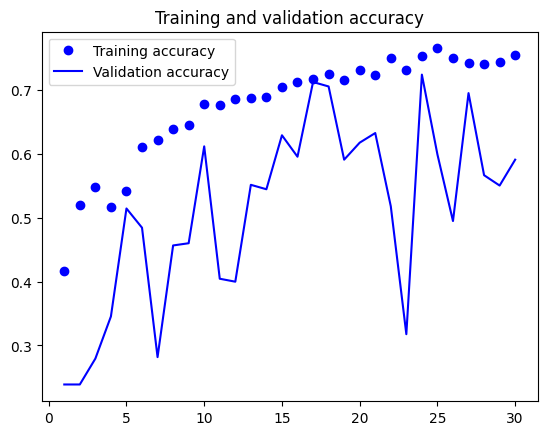

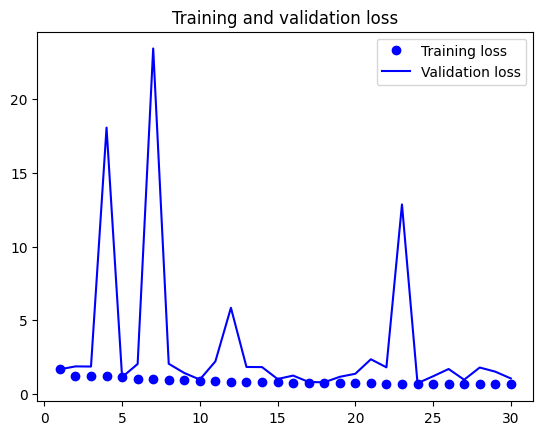

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
resnet50_model = keras.models.load_model("resnet50.keras")
resnet50_model.evaluate(validation_dataset)

27/27 [==============================] - 6s 107ms/step - loss: 0.7353 - accuracy: 0.7242


[0.7353402972221375, 0.7242178320884705]

In [ ]:
# ¯\_(ツ)_/¯, /\/\/

In [ ]:
# implementing xception, original implementation used shape = (299, 299, 3)

In [ ]:
train_dataset= keras.utils.image_dataset_from_directory(directory='flowers',
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   batch_size=32,
                                                   image_size=(299,299),
                                                   seed=27,
                                                   validation_split=0.2,
                                                   subset='training')

validation_dataset = keras.utils.image_dataset_from_directory(directory='flowers',
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   batch_size=32,
                                                   image_size=(299,299),
                                                   seed=27,
                                                   validation_split=0.2,
                                                   subset='validation')

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
def xception(input_shape=(299, 299, 3), n_classes=5):

    def conv_bn(x, f, k, s=1, p='same'):
        x = Conv2D(f, k, strides=s, padding=p, use_bias=False)(x)
        x = BatchNormalization()(x)
        return x

    def sep_bn(x, f, k, s=1, p='same'):
        x = SeparableConv2D(f, k, strides=s, padding=p, use_bias=False)(x)
        x = BatchNormalization()(x)
        return x

    def entry_flow(x):
        x = conv_bn(x, 32, 3, 2)
        x = ReLU()(x)
        x = conv_bn(x, 64, 3)
        tensor = ReLU()(x)

        x = sep_bn(tensor, 128, 3)
        x = ReLU()(x)
        x = sep_bn(x, 128, 3)
        x = MaxPool2D(3, strides=2, padding='same')(x)

        tensor = conv_bn(tensor, 128, 1, 2)

        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = ReLU()(x)
        x = sep_bn(x, 256, 3)
        x = MaxPool2D(3, strides=2, padding='same')(x)

        tensor = conv_bn(tensor, 256, 1, 2)

        x = Add()([tensor, x])
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 728, 3)
        x = MaxPool2D(3, strides=2, padding='same')(x)

        tensor = conv_bn(tensor, 728, 1, 2)
        x = Add()([tensor, x])

        return x

    def middle_flow(tensor):
        for _ in range(8):
            x = ReLU()(tensor)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)
            x = ReLU()(x)
            x = sep_bn(x, 728, 3)

            tensor = Add()([tensor, x])

        return tensor

    def exit_flow(tensor):
        x = ReLU()(tensor)
        x = sep_bn(x, 728, 3)
        x = ReLU()(x)
        x = sep_bn(x, 1024, 3)
        x = MaxPool2D(3, strides=2, padding='same')(x)

        tensor = conv_bn(tensor, 1024, 1, 2)

        x = Add()([tensor, x])
        x = sep_bn(x, 1536, 3)
        x = ReLU()(x)
        x = sep_bn(x, 2048, 3)
        x = ReLU()(x)
        x = GlobalAvgPool2D()(x)
        x = Dense(n_classes, activation='softmax')(x)

        return x

    input = keras.Input(input_shape)
    x = data_augmentation(input)
    x = entry_flow(x)
    x = middle_flow(x)
    output = exit_flow(x)

    model = keras.Model(input, output)

    return model


In [ ]:
xception_model = xception()

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="xception.keras",
    save_best_only=True,
    monitor="val_accuracy"),
 ]

In [ ]:
xception_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

history = xception_model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
108/108 [==============================] - 129s 844ms/step - loss: 1.2968 - accuracy: 0.4896 - val_loss: 1.6066 - val_accuracy: 0.3337
Epoch 2/30
108/108 [==============================] - 72s 666ms/step - loss: 1.0169 - accuracy: 0.6039 - val_loss: 1.5849 - val_accuracy: 0.3094
Epoch 3/30
108/108 [==============================] - 74s 682ms/step - loss: 0.9049 - accuracy: 0.6488 - val_loss: 1.5275 - val_accuracy: 0.3801
Epoch 4/30
108/108 [==============================] - 72s 668ms/step - loss: 0.8670 - accuracy: 0.6511 - val_loss: 1.4507 - val_accuracy: 0.3627
Epoch 5/30
108/108 [==============================] - 74s 682ms/step - loss: 0.8352 - accuracy: 0.6723 - val_loss: 1.0687 - val_accuracy: 0.5562
Epoch 6/30
108/108 [==============================] - 74s 681ms/step - loss: 0.8076 - accuracy: 0.6862 - val_loss: 0.8568 - val_accuracy: 0.6906
Epoch 7/30
108/108 [==============================] - 73s 668ms/step - loss: 0.7745 - accuracy: 0.7151 - val_loss: 1.2112 - val_a

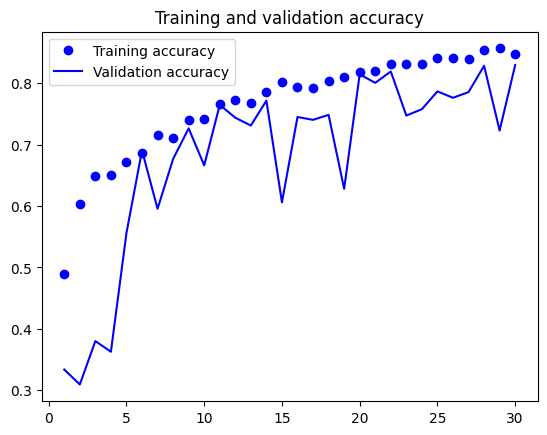

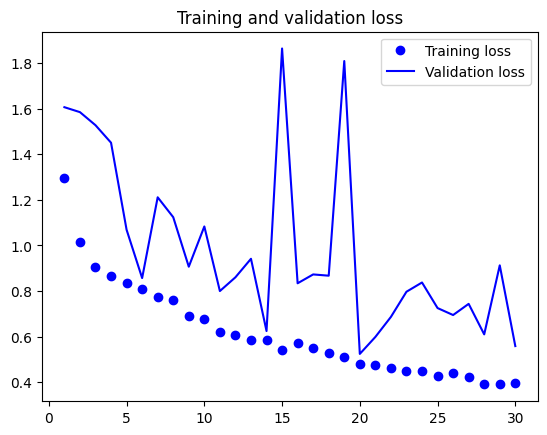

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# training for extra 20 epochs, because the model didnt overfit
history = xception_model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
108/108 [==============================] - 73s 677ms/step - loss: 0.3819 - accuracy: 0.8590 - val_loss: 0.9377 - val_accuracy: 0.7474
Epoch 2/20
108/108 [==============================] - 72s 666ms/step - loss: 0.3939 - accuracy: 0.8573 - val_loss: 0.5874 - val_accuracy: 0.8019
Epoch 3/20
108/108 [==============================] - 73s 677ms/step - loss: 0.3709 - accuracy: 0.8651 - val_loss: 0.4511 - val_accuracy: 0.8528
Epoch 4/20
108/108 [==============================] - 73s 673ms/step - loss: 0.3566 - accuracy: 0.8665 - val_loss: 0.5991 - val_accuracy: 0.8053
Epoch 5/20
108/108 [==============================] - 73s 673ms/step - loss: 0.3407 - accuracy: 0.8729 - val_loss: 0.5836 - val_accuracy: 0.8262
Epoch 6/20
108/108 [==============================] - 72s 665ms/step - loss: 0.3562 - accuracy: 0.8712 - val_loss: 0.6226 - val_accuracy: 0.8181
Epoch 7/20
108/108 [==============================] - 72s 668ms/step - loss: 0.3607 - accuracy: 0.8636 - val_loss: 0.4831 - val_ac

In [ ]:
best_model = keras.models.load_model("xception.keras")
best_model.evaluate(validation_dataset)

27/27 [==============================] - 6s 168ms/step - loss: 0.4511 - accuracy: 0.8528


[0.45106568932533264, 0.852838933467865]

In [ ]:
# 85% accuracy is ok, considering the amount of data we have, and we are training from scratch